# Titanic Proyect

* Acces to the data

In [16]:
import numpy as np # linear algebra                                                                                                           
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)                                                                        
import matplotlib.pyplot as plt # this is used for the plot the graph                                                                         
import seaborn as sns # used for plot interactive graph.                                                                                      
#import pandas_profiling
from pandas_profiling import ProfileReport

%matplotlib inline  

In [17]:
df = pd.read_csv("train.csv", sep=",")

## Descriptive analysis

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.shape

(891, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
ProfileReport(df)


Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


<Figure size 800x550 with 0 Axes>

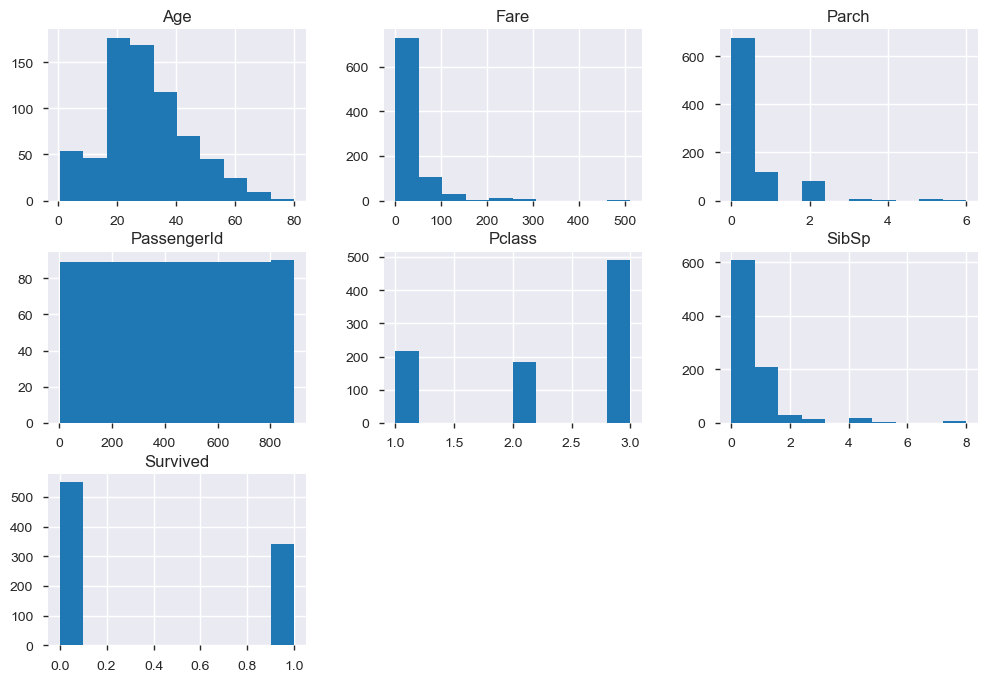

<Figure size 800x550 with 0 Axes>

In [23]:
df.hist(figsize=(12,8))
plt.figure()

## Correlations

In [24]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


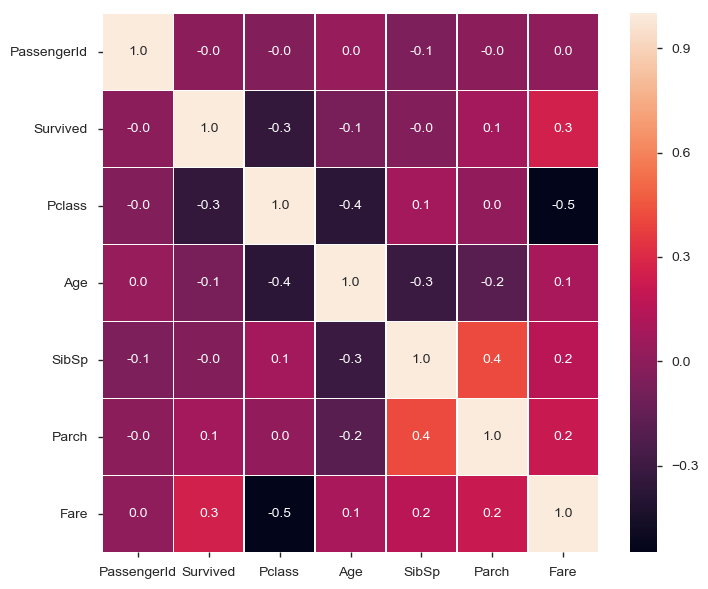

In [25]:
fig,ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(df.corr(), annot=True,linewidths=.5,fmt='.1f')
plt.show()

* Surviving rate

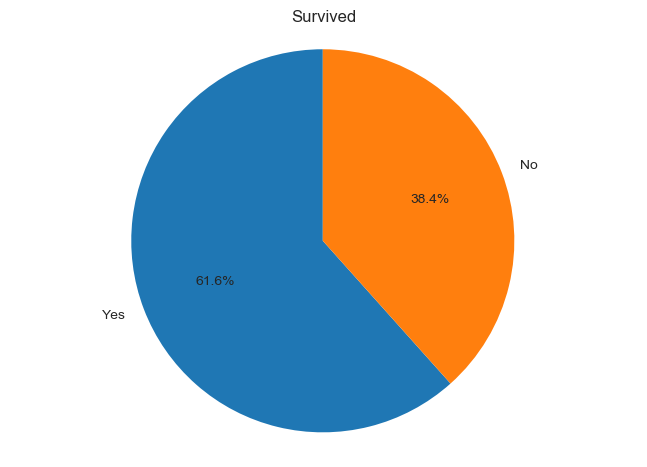

In [26]:
col = "Survived"
grouped = df[col].value_counts().reset_index() # def[col] takes the columns Survived, value_counts() 
    #counts the no of each value
    #grouped is a matrix: rows: 0,1. Three Columns: 0 or 1, index and survived.
grouped = grouped.rename(columns = {col : "count", "index" : col}) # (col = Survived) so rename columns: Survived to 
#count, and index to Survived 

# The elements can be accessed as a matrix: list["column"][raw].
# So, the number of persons who did not survived is grouped['count'][0]

labels = 'Yes', 'No'
sizes = grouped['count']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Survived")
plt.show()

* Sex 

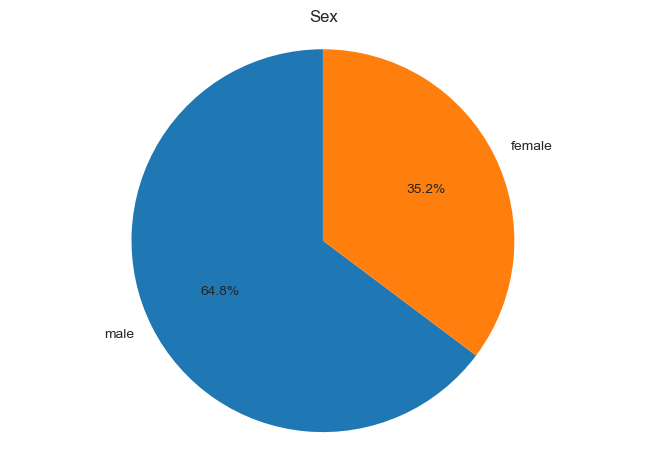

In [27]:
col = "Sex"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col}) 

labels = 'male', 'female'
sizes = grouped['count']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Sex")
plt.show()

* Surviving rate female vs male

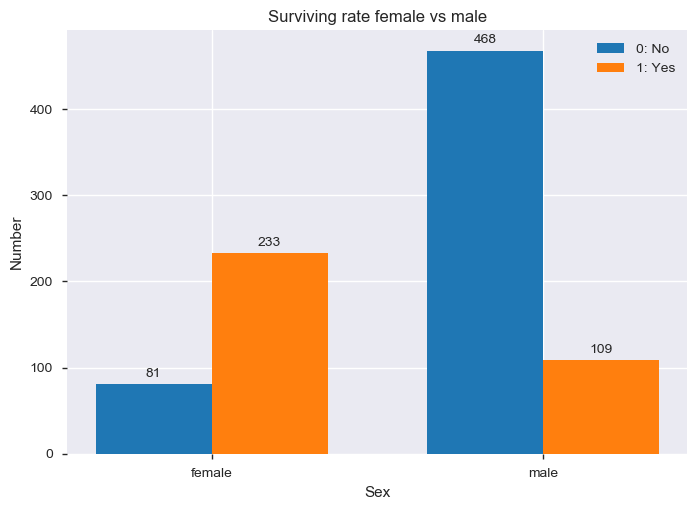

In [28]:
x=df
d1=x[x['Survived']==0] # Selected data of persons who did not survived
d2=x[x['Survived']==1] # Selected data of persons who did survived

col='Sex'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count'])) 
# An additional column is included into the data
# "percent" and it is filled by the calculation inside apply function
v1=v1.sort_values(col)

v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

labels = 'female', 'male'
sizes1 = v1['count']
sizes2 = v2['count']
xl = np.arange(len(labels))  # the label locations (its an arrange=[0,1])
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(xl - width/2, sizes1, width, label='0: No')
rects2 = ax.bar(xl + width/2, sizes2, width, label='1: Yes')

ax.set_ylabel('Number')
ax.set_xlabel('Sex')
ax.set_title('Surviving rate female vs male')
ax.set_xticks(xl)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

* Surviving rate in Pclass (1 = upper class, 2 = middle class, and 3 = lower class)

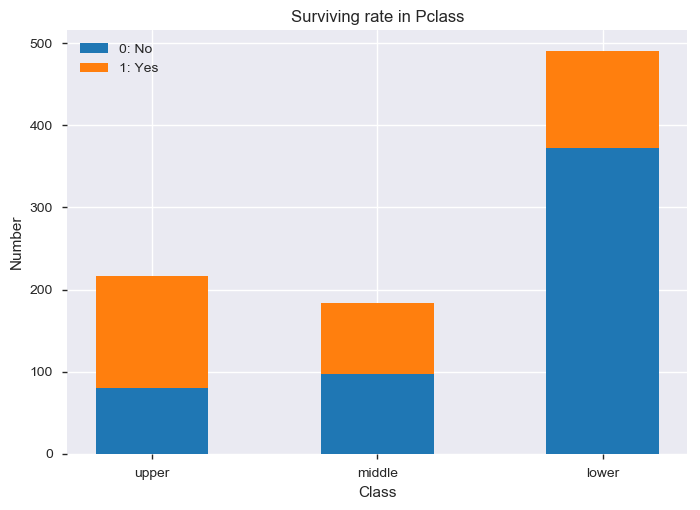

In [31]:
col='Pclass'
#v1 -> Not survived
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count'])) 
v1=v1.sort_values(col)
#v2 -> Survived
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

labels = 'upper', 'middle', 'lower'
xl = np.arange(len(labels))  # the label locations (its an arrange=[0,1])
width = 0.5  # the width of the bars
sizes1 = v1['count']
sizes2 = v2['count']

fig, ax = plt.subplots()
rects1 = ax.bar(xl, sizes1, width, label='0: No')
rects2 = ax.bar(xl, sizes2, width, bottom=sizes1, label='1: Yes')

ax.set_ylabel('Number')
ax.set_xlabel('Class')
ax.set_title('Surviving rate in Pclass')
ax.set_xticks(xl)
ax.set_xticklabels(labels)

ax.legend()

#autolabel(rects1+autolabel(rects2))

#ax.annotate('{}'.format(height), xy=(rects2.get_x() + rects2.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()


<BarContainer object of 3 artists>
<BarContainer object of 3 artists>
[216, 184, 491]
